In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression, make_swiss_roll
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.svm import SVR

In [2]:
df = pd.read_csv(r'C:\Users\nnoar\OneDrive\Desktop\homework\Machine_Learning_Group_Prjoect\Resources\great_lakes.csv')

In [20]:
df.head()
df_dummies = pd.get_dummies(df,drop_first=True)

In [21]:
df_dummies.shape

(52049, 151)

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
df_pca = pca.fit_transform(df_dummies.drop('price',axis=1))

In [36]:
df_2 = pd.DataFrame(data=df_pca,columns=['1','2','3','4'])
df_2.head()

,1,2,3,4
0,112.960292,-4.550290,1.956870,-0.064011
1,-87.041693,-4.364098,1.863844,0.146300
2,512.963469,-3.812718,0.552179,-0.386613
3,-325.041776,-3.015695,0.096658,-0.930431
4,-287.041127,-3.477927,0.192030,-0.029330


In [37]:
pca.explained_variance_ratio_.sum()

0.9999628833115248

In [39]:
X = df_2
y = df_dummies['price']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.15, random_state=42)

In [42]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [43]:
def test_model(model, data):
     X_train_scaled, X_test_scaled, y_train, y_test = data
     reg = model.fit(X_train_scaled, y_train)
     print(f'Model: {type(reg).__name__}')
     print(f'Train score: {reg.score(X_train_scaled, y_train)}')
     print(f'Test Score: {reg.score(X_test_scaled, y_test)}\n')
     plt.show() 
data = X_train_scaled,X_test_scaled,y_train,y_test 

In [55]:
test_model(LinearRegression(),data)
test_model(KNeighborsRegressor(),data)
test_model(RandomForestRegressor(n_estimators=90), data)
test_model(ExtraTreesRegressor(), data)
test_model(AdaBoostRegressor(), data)


Model: LinearRegression
Train score: 0.026749768636394222
Test Score: 0.05147161123906352

Model: KNeighborsRegressor
Train score: 0.3034196364613915
Test Score: 0.2190736951025516

Model: RandomForestRegressor
Train score: 0.751929569118297
Test Score: -0.022908127081057827

Model: ExtraTreesRegressor
Train score: 0.8599010061431389
Test Score: 0.272477044952776

Model: AdaBoostRegressor
Train score: 0.3704736308744627
Test Score: 0.008223924623107282



In [60]:
test_model(ExtraTreesRegressor(n_estimators=100, n_jobs=4, min_samples_split=25,
                            min_samples_leaf=35),data)

Model: ExtraTreesRegressor
Train score: 0.08859842819893982
Test Score: 0.13915427939804537



In [45]:
regressor = KNeighborsRegressor()
regressor.fit(X_train_scaled,y_train)

KNeighborsRegressor()

In [46]:
y_pred = regressor.predict(X_test_scaled)
pred_df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [47]:
pred_df

,Actual,Predicted
22714,1400,2024.0
508,744,746.0
21289,2300,1827.0
8546,770,751.0
42030,975,1171.0
...,...,...
2510,1965,1539.2
839,1190,2719.0
46651,1020,984.0
13352,1390,1410.0


k: 1, Train/Test Score: 0.772/-0.580
k: 3, Train/Test Score: 0.416/-0.171
k: 5, Train/Test Score: 0.303/0.219
k: 7, Train/Test Score: 0.239/0.098
k: 9, Train/Test Score: 0.212/0.180
k: 11, Train/Test Score: 0.189/0.135
k: 13, Train/Test Score: 0.172/0.154
k: 15, Train/Test Score: 0.158/0.154
k: 17, Train/Test Score: 0.148/0.160
k: 19, Train/Test Score: 0.137/0.153


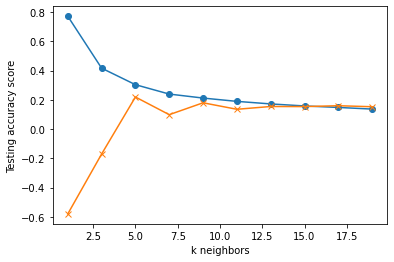

In [48]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy score")
plt.show()

In [13]:
regressor = KNeighborsRegressor(n_neighbors=11)
regressor.fit(X_train_scaled,y_train)

KNeighborsRegressor(n_neighbors=11)

In [16]:
y_true = y_test
y_pred = regressor.predict(X_test_scaled)

In [18]:
y_pred = regressor.predict(X_test_scaled)
pred_df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [20]:
print('k=11 Test Acc: %.3f' % regressor.score(X_test_scaled, y_test))

k=11 Test Acc: 0.898


In [19]:
pred_df

,Actual,Predicted
22468,1993,2323.090909
2942,595,666.272727
33818,810,703.181818
1907,1150,1218.181818
35285,745,745.000000
...,...,...
39262,810,752.818182
9396,429,453.727273
31848,880,1044.090909
18759,749,976.272727


In [49]:
X = df_2.values
y = df_dummies['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.15, random_state=42)

In [51]:
import tensorflow as tf

In [53]:
# Define the deep learning model 
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu", input_dim=4))
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
1383/1383 [==============================] - 3s 2ms/step - loss: -942504.9375 - accuracy: 6.5550e-04
Epoch 2/50
1383/1383 [==============================] - 2s 1ms/step - loss: -11405810.0000 - accuracy: 6.5550e-04
Epoch 3/50
1383/1383 [==============================] - 2s 2ms/step - loss: -41320820.0000 - accuracy: 6.5550e-04
Epoch 4/50
1383/1383 [==============================] - 2s 1ms/step - loss: -95184256.0000 - accuracy: 6.5550e-04
Epoch 5/50
1383/1383 [==============================] - 2s 1ms/step - loss: -175865200.0000 - accuracy: 6.5550e-04
Epoch 6/50
1383/1383 [==============================] - 2s 1ms/step - loss: -287486912.0000 - accuracy: 6.5550e-04
Epoch 7/50
1383/1383 [==============================] - 2s 1ms/step - loss: -434836832.0000 - accuracy: 6.5550e-04
Epoch 8/50
1383/1383 [==============================] - 2s 1ms/step - loss: -620082048.0000 - accuracy: 6.5550e-04
Epoch 9/50
1383/1383 [==============================] - 1s 926us/step - loss: -8440592

In [19]:
# # X = df_dummies.drop('price',axis=1)
# y = df_dummies['price']
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.fit_transform(X_test)
# def test_model(model, data):
#     X_train_scaled, X_test_scaled, y_train, y_test = data
#     reg = model.fit(X_train_scaled, y_train)
#     print(f'Model: {type(reg).__name__}')
#     print(f'Train score: {reg.score(X_train_scaled, y_train)}')
#     print(f'Test Score: {reg.score(X_test_scaled, y_test)}\n')
#     plt.show() 
# data = X_train_scaled,X_test_scaled,y_train,y_test

In [20]:
#test_model(LinearRegression(),data)

In [21]:
#test_model(KNeighborsRegressor(),data)

In [22]:
#test_model(RandomForestRegressor(),data)